In [1]:
# 做完特徵工程前的所有準備 (與前範例相同)
import pandas as pd
import numpy as np
import copy
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

df_train = pd.read_csv('http://bit.ly/kaggletrain')
df_test = pd.read_csv('http://bit.ly/kaggletrain')

train_Y = df_train['Survived']
ids = df_test['PassengerId']
df_train = df_train.drop(['PassengerId', 'Survived'] , axis=1)
df_test = df_test.drop(['PassengerId'] , axis=1)
df = pd.concat([df_train,df_test])
df.head()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,NaN,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,NaN,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,NaN,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,NaN,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,NaN,373450


In [2]:
#只取 int64, float64 兩種數值型欄位, 存於 num_features 中
num_features = []
for dtype, feature in zip(df.dtypes, df.columns):
    if dtype == 'float64' or dtype == 'int64':
        num_features.append(feature)
print(f'{len(num_features)} Numeric Features : {num_features}\n')

# 削減文字型欄位, 只剩數值型欄位
df = df[num_features]
df = df.fillna(0)
MMEncoder = MinMaxScaler()
train_num = train_Y.shape[0]
df.head()

6 Numeric Features : ['Age', 'Fare', 'Parch', 'Pclass', 'SibSp', 'Survived']



,Age,Fare,Parch,Pclass,SibSp,Survived
0,22.0,7.2500,0,3,1,0.0
1,38.0,71.2833,0,1,1,0.0
2,26.0,7.9250,0,3,0,0.0
3,35.0,53.1000,0,1,1,0.0
4,35.0,8.0500,0,3,0,0.0


In [3]:
# 顯示 Fare 與目標值的散佈圖
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(df['Fare'][:train_num])
plt.show()

<Figure size 640x480 with 1 Axes>

In [4]:
# 計算基礎分數
df_mm = MMEncoder.fit_transform(df)
train_X = df_mm[:train_num]
estimator = LogisticRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.701537882116628

## 試著在鐵達尼的票價 (Fare) 欄位中使用對數去偏 (log1p) , 結果是否更好?

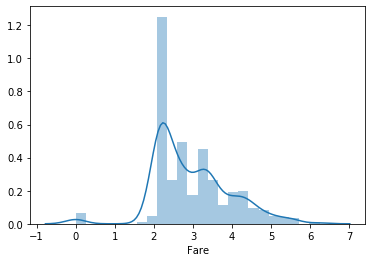

0.7082982863599272

In [5]:
# 將 Fare 取 log1p 後, 看散佈圖, 並計算分數 (作業1)
df_fixed = copy.deepcopy(df)
df_fixed['Fare'] = np.log1p(df_fixed['Fare'])
sns.distplot(df_fixed['Fare'][:train_num])
plt.show()

df_fixed = MMEncoder.fit_transform(df_fixed)
train_X = df_fixed[:train_num]
estimator = LogisticRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

最後的 boxcox 區塊直接執行會造成錯誤, 起因為輸入值有負值, 請問如何修正後可以使用 boxcox? (Hint : 試圖修正資料)

如同 log1p : 取log前需要加1, 以避免 0 取 log 時無意義的情形

boxcox 也需要先加 1 , 再進行計算即可

(參考下列程式 : 計算 boxcox 前, 將 Fare 數值加上 1)

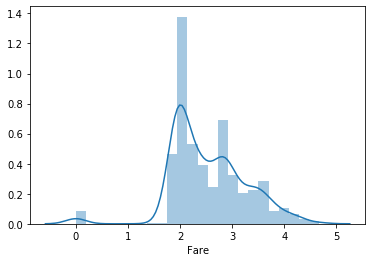

0.7094156047956813

In [6]:
# 將 Fare 取 boxcox 後, 看散佈圖, 並計算分數 (執行會有 error, 請試圖修正 - 作業2)
from scipy import stats
df_fixed = copy.deepcopy(df)
# 修正方式 : 加入下面這一行, 使最小值大於 0, 類似log1p的概念
df_fixed['Fare'] = df_fixed['Fare'] + 1
df_fixed['Fare'] = stats.boxcox(df_fixed['Fare'])[0]
sns.distplot(df_fixed['Fare'][:train_num])
plt.show()

df_fixed = MMEncoder.fit_transform(df_fixed)
train_X = df_fixed[:train_num]
estimator = LogisticRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()